https://www.kaggle.com/code/bengazjuk/bank-term-deposit-predictions?scriptVersionId=158957227&cellId=45


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import time

In [198]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Exploratory Data Analysis

In [199]:
# train = pd.DataFrame(train)
# train

# print(train.describe())
# # print(train.info())
# print(test.describe())
# plt.figure(figsize=(10,5))
# c= train.corr()
# sns.heatmap(c,cmap="BrBG",annot=True)
# plt.savefig("train.png")
# print(c)
# sns.pairplot(train, hue = 'education')
# plt.savefig("train.png")

In [200]:
# test = pd.DataFrame(test)
# test
# plt.figure(figsize=(10,5))
# c= test.corr()
# sns.heatmap(c,cmap="BrBG",annot=True)
# plt.savefig("test.png")
# print(c)
# sns.pairplot(test, hue = 'education')
# plt.savefig("test.png")

Data Processing


In [201]:
train = train.apply(LabelEncoder().fit_transform)
test = test.apply(LabelEncoder().fit_transform)

In [202]:
X_train, X_test = train.drop(labels = 'y', axis = 1), test.drop(labels = 'y', axis = 1)
y_train, y_test = train['y'], test['y']
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train.head())

In [203]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# X_train

1) Logistic Regression

In [204]:
start = time.time()
logr = LogisticRegression(random_state = 0)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
end = time.time()
print(end-start)

0.5507278442382812


In [205]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3810
           1       0.59      0.43      0.50       711

    accuracy                           0.86      4521
   macro avg       0.75      0.69      0.71      4521
weighted avg       0.85      0.86      0.86      4521



In [206]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.8641893386418934
Precision: 0.6894780557493605
recall: 0.7462951055662188
f1: 0.7115031095664899


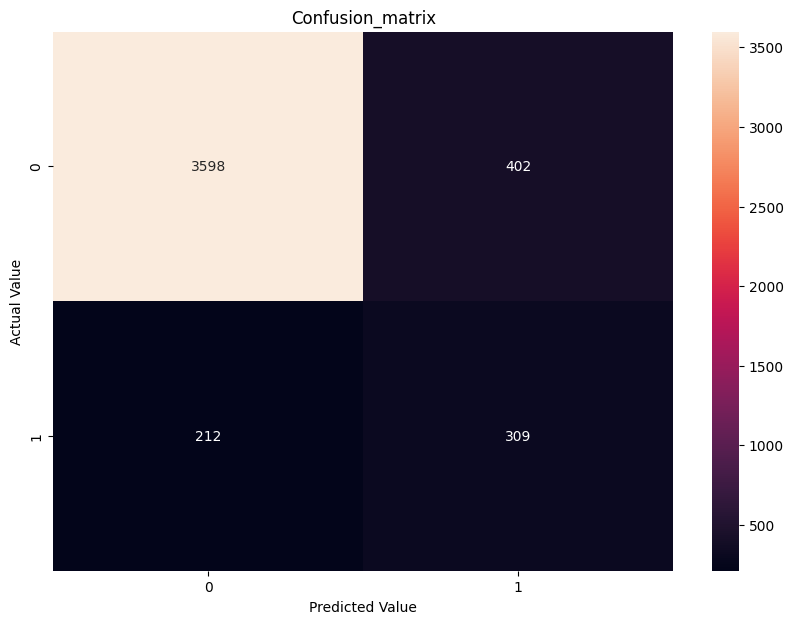

In [207]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_lr.png')
plt.show()

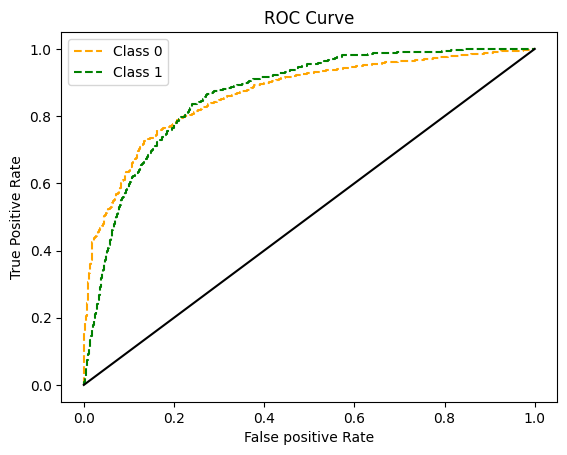

In [208]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_lr.png')
plt.show()

In [209]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7462951055662188


2) RandomForestClassifier

In [210]:
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
end = time.time()
print(end - start)

8.02413558959961


In [211]:
print("Classification Report: ", classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.92      3690
           1       0.74      0.47      0.57       831

    accuracy                           0.87      4521
   macro avg       0.82      0.71      0.75      4521
weighted avg       0.86      0.87      0.86      4521



In [212]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.8721521787215218
Precision: 0.7146948039877511
recall: 0.8159011516314779
f1: 0.7486613291679811


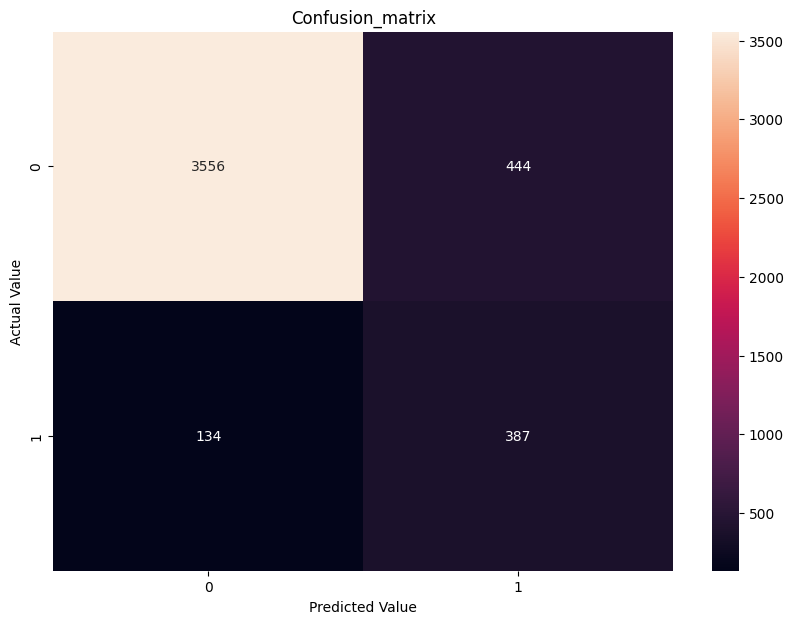

In [213]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_rfc.png')
plt.show()

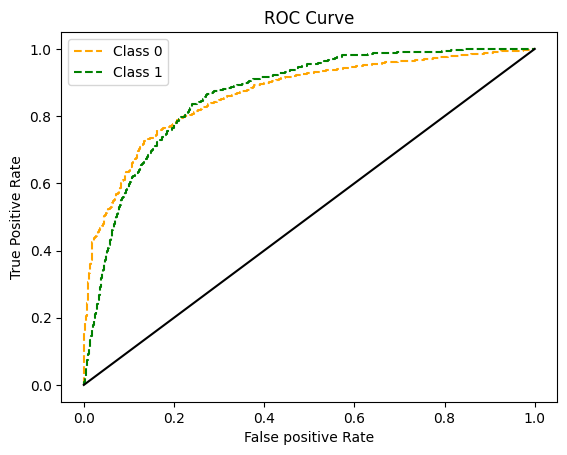

In [214]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_rfc.png')
plt.show()


In [215]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.8159011516314779


3)Naive Bayes Classfier


In [216]:
start = time.time()
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)
end = time.time()
print(end-start)

0.0222165584564209


In [217]:
print("Classification Report: ", classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.74      0.96      0.84      3090
           1       0.79      0.29      0.42      1431

    accuracy                           0.75      4521
   macro avg       0.77      0.63      0.63      4521
weighted avg       0.76      0.75      0.71      4521



In [218]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.750055297500553
Precision: 0.6258065172701552
recall: 0.7669337811900192
f1: 0.6308635748803441


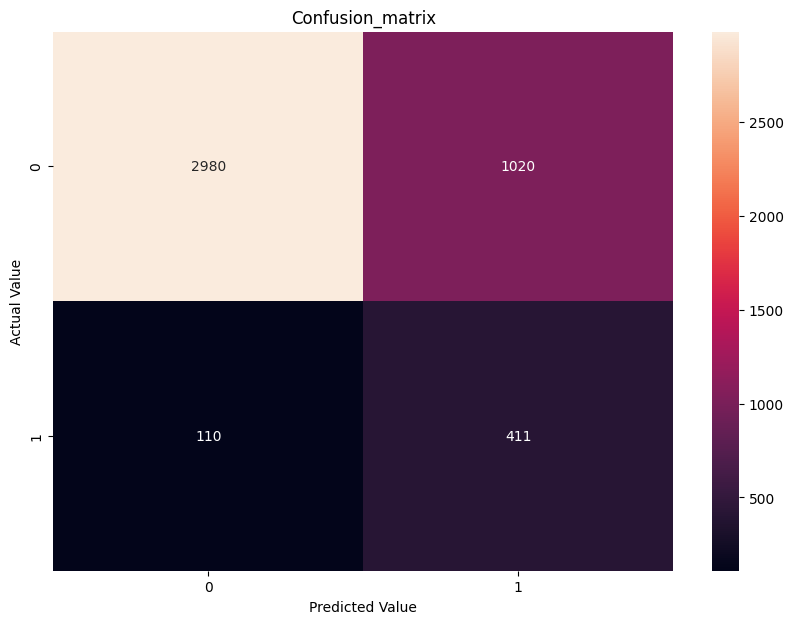

In [219]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_nb.png')
plt.show()

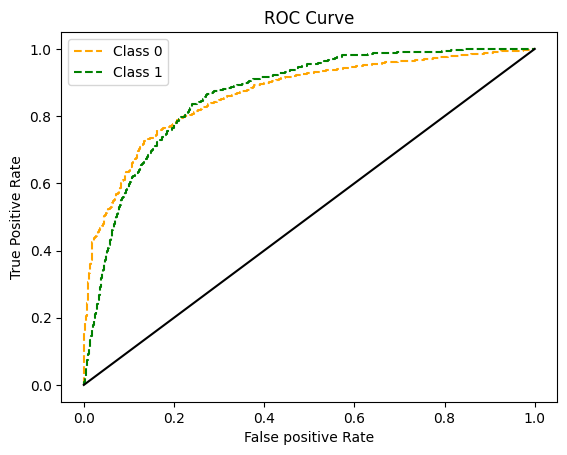

In [220]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_nb.png')
plt.show()

In [221]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7669337811900191


4)Support Vector
Machine

In [222]:
start = time.time()
svc = svm.SVC(kernel='linear', C=1,gamma=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
end = time.time()
print(end - start)

20.03103232383728


In [223]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4521
           1       0.00      0.00      0.00         0

    accuracy                           0.88      4521
   macro avg       0.50      0.44      0.47      4521
weighted avg       1.00      0.88      0.94      4521



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.8847600088476001
Precision: 0.44238000442380004
recall: 0.5
f1: 0.46942847083675626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


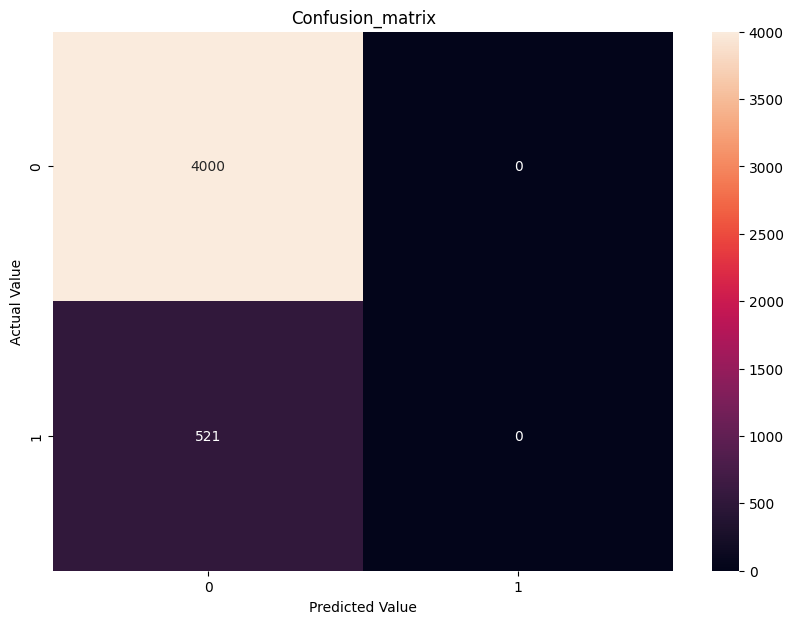

In [225]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_svm.png')
plt.show()

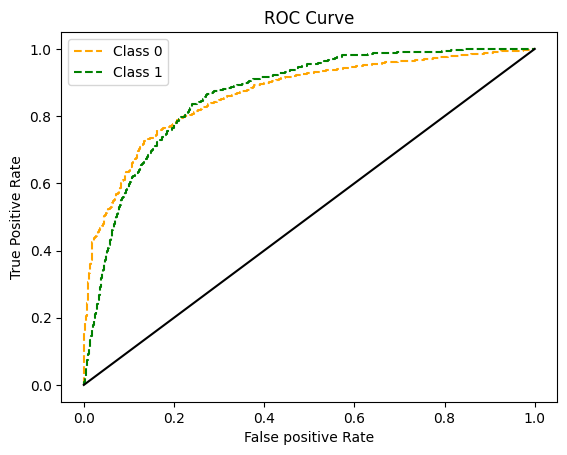

In [226]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_svm.png')
plt.show()

In [227]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.5


5) Gradient Boosting

In [228]:
start = time.time()
gbc = GradientBoostingClassifier(random_state=100)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
end = time.time()
print(end-start)

6.6636271476745605


In [229]:
print("Classification Report: ", classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.92      3688
           1       0.73      0.46      0.56       833

    accuracy                           0.87      4521
   macro avg       0.81      0.71      0.74      4521
weighted avg       0.86      0.87      0.86      4521



In [230]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.8690555186905552
Precision: 0.7097109993672089
recall: 0.8091429942418427
f1: 0.7428869177078898


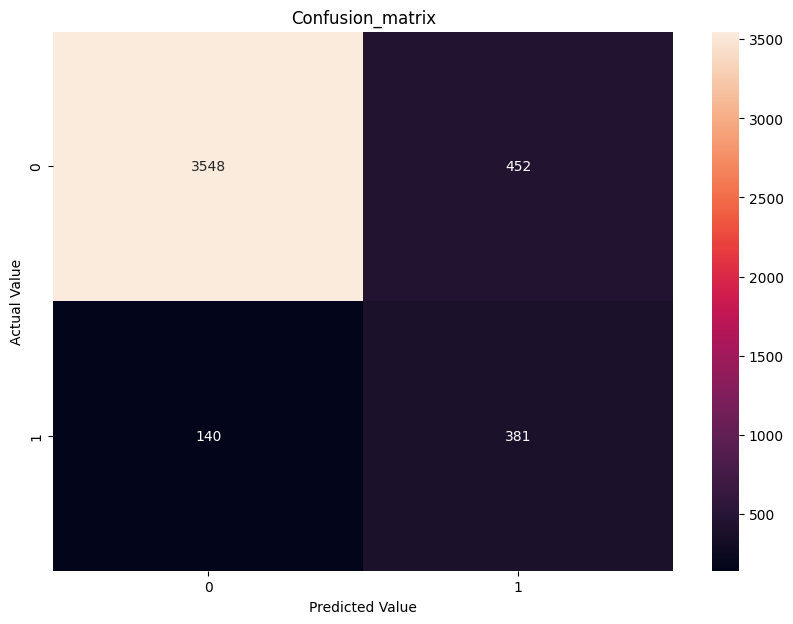

In [231]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_gb.png')
plt.show()

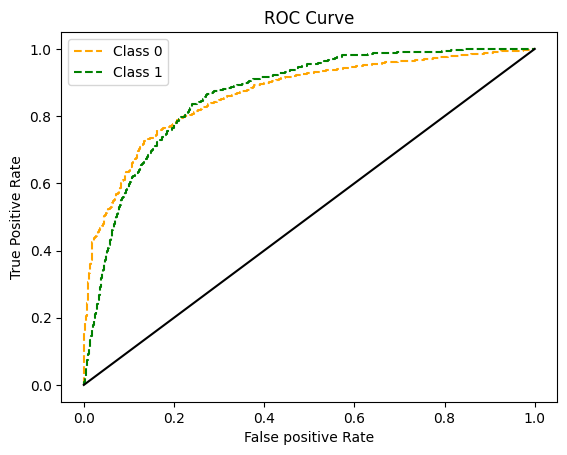

In [232]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_gb.png')
plt.show()

In [233]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.8091429942418427


6) Decision Tree

In [234]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
end = time.time()
print(end-start)

0.33082079887390137


In [235]:
print("Classification Report: ", classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.80      0.94      0.86      3389
           1       0.62      0.29      0.39      1132

    accuracy                           0.78      4521
   macro avg       0.71      0.61      0.63      4521
weighted avg       0.75      0.78      0.75      4521



In [236]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.7772616677726166
Precision: 0.6134556875445084
recall: 0.7088558061420345
f1: 0.6272604663969273


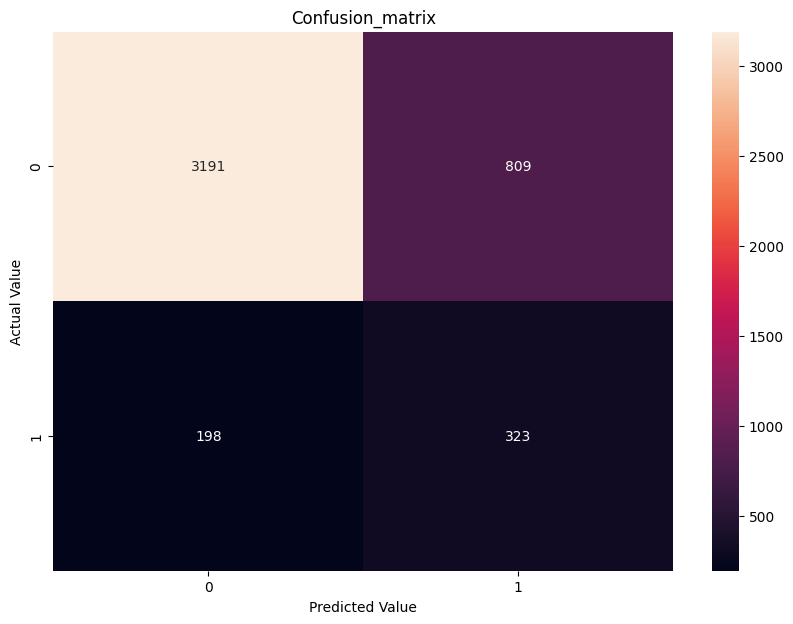

In [237]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_dt.png')
plt.show()

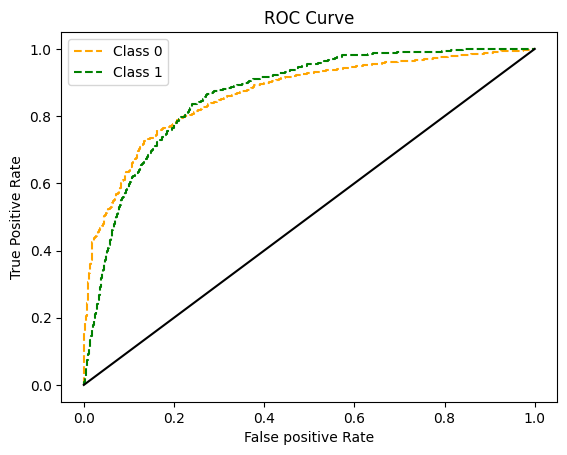

In [238]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
# plt.savefig('roc_dt.png')
plt.show()

In [239]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7088558061420346


7) KNN

In [240]:
start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
print(end - start)

2.0028040409088135


In [241]:
print("Classification Report: ", classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95      4021
           1       0.60      0.62      0.61       500

    accuracy                           0.91      4521
   macro avg       0.77      0.78      0.78      4521
weighted avg       0.91      0.91      0.91      4521



In [242]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

Accuracy: 0.9117451891174518
Precision: 0.7848870927629943
recall: 0.7748394913627639
f1: 0.7797311196209851


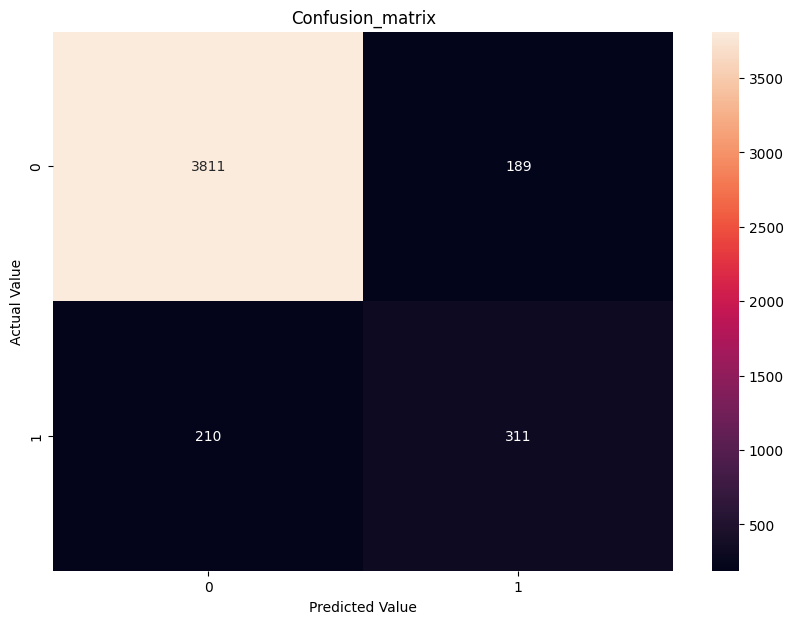

In [243]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion_matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
# plt.savefig('con_knn.png')
plt.show()

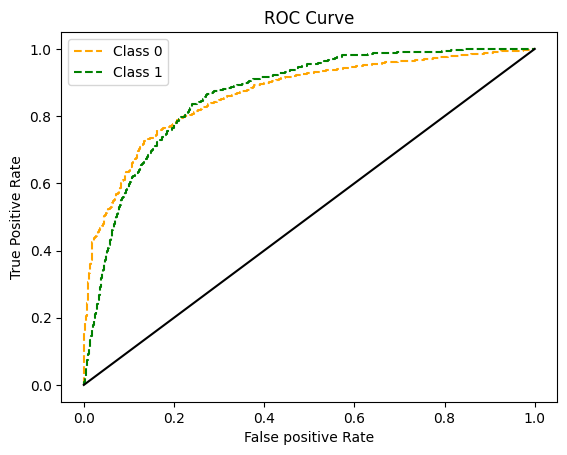

In [244]:
y_pred_lr = logr.predict_proba(X_test)
random_proba = [0 for i in range(len(y_test))]
fpr = {}
tpr = {}
thresh = {}
n_class = 2
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_lr[:,i], pos_label = i)
  colors = ['orange', 'green']
for i in range(n_class):
  plt.plot(fpr[i], tpr[i], linestyle = '--', color = colors[i], label = 'Class {}'.format(i))

plt.plot([0,1],[0,1], color = 'black')
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.savefig('roc_knn.png')
plt.show()

In [245]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7748394913627639
